In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [74]:
train_data = pd.read_csv("./Data/train.csv")
train_data.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [75]:
test_data = pd.read_csv("./Data/test.csv")
test_data.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

## Change values to correlation analysis

In [76]:
# Change yes and no to 1 and 0
train_data['Gender'] = train_data['Gender'].replace({'Male': 1.0, 'Female': 0.0})
train_data['family_history_with_overweight'] = train_data['family_history_with_overweight'].replace({'yes': 1.0, 'no': 0.0})
train_data['FAVC'] = train_data['FAVC'].replace({'yes': 1.0, 'no': 0.0})
train_data['SMOKE'] = train_data['SMOKE'].replace({'yes': 1.0, 'no': 0.0})
train_data['SCC'] = train_data['SCC'].replace({'yes': 1.0, 'no': 0.0})


C:\Users\a239277\AppData\Local\Temp\ipykernel_21240\659415644.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Gender'] = train_data['Gender'].replace({'Male': 1.0, 'Female': 0.0})
C:\Users\a239277\AppData\Local\Temp\ipykernel_21240\659415644.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['family_history_with_overweight'] = train_data['family_history_with_overweight'].replace({'yes': 1.0, 'no': 0.0})
C:\Users\a239277\AppData\Local\Temp\ipykernel_21240\659415644.py:4: FutureWarning: Downcasting behavi

## Correlation analysis

<Axes: >

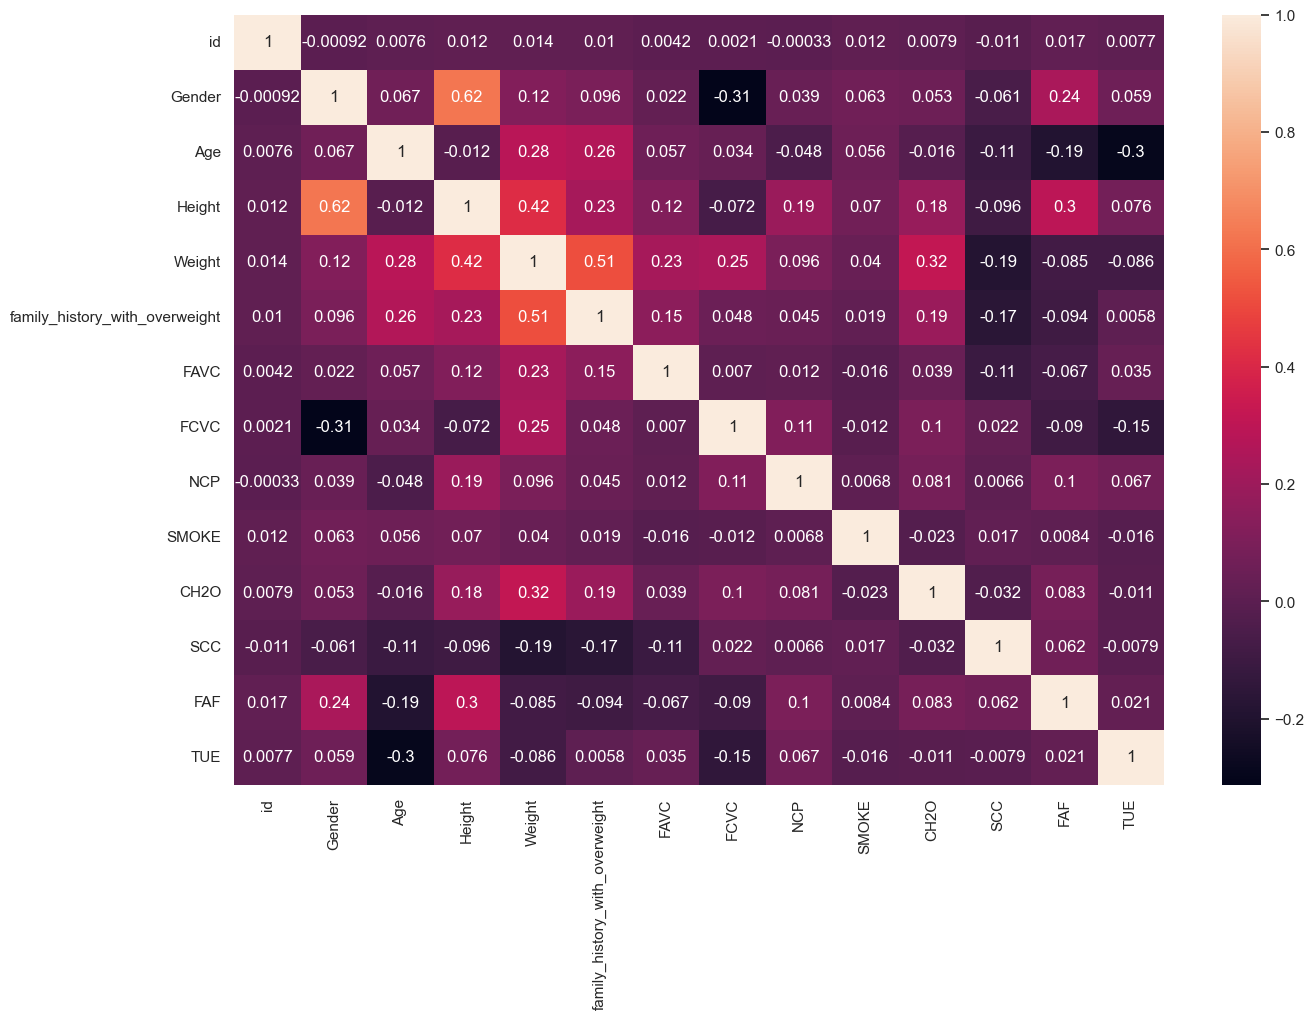

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.select_dtypes('number').corr(), annot=True)

In [97]:
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
         'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

order_seaborn = ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I', 'Overweight_Level_II', 'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight']

Text(0.5, 0, 'Gender (0 = Woman; 1 = Man)')

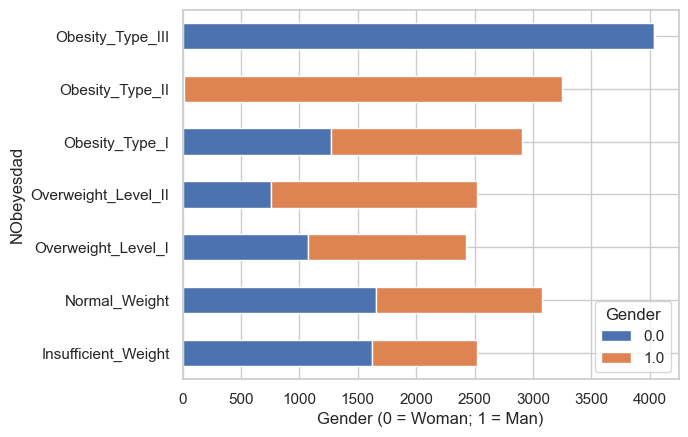

In [103]:
# Check SCC for each class
scc_counts = train_data.groupby('NObeyesdad')['Gender'].value_counts().unstack()

# Reorder rows
scc_counts = scc_counts.reindex(order)

# Check the distribution of the SCC in the dataset
scc_counts.plot(kind='barh', stacked=True)

plt.xlabel('Gender (0 = Woman; 1 = Man)')

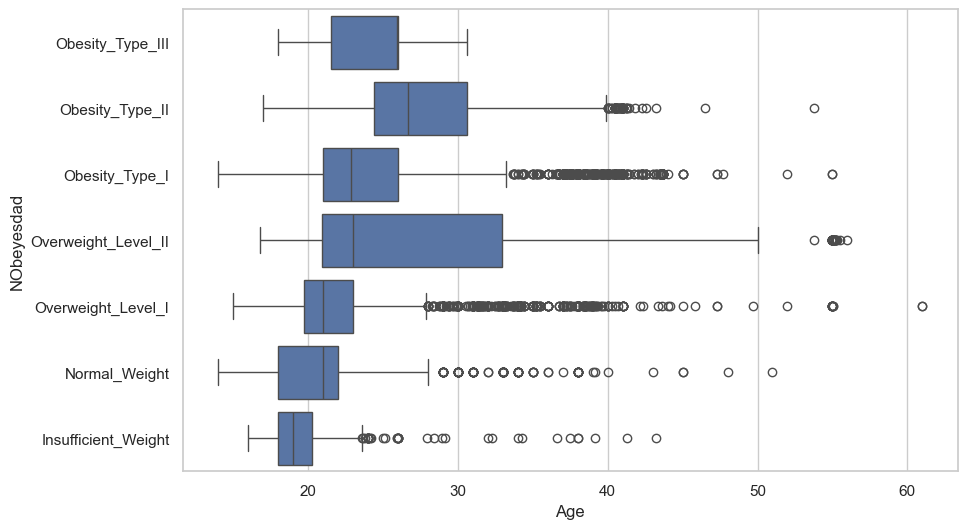

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='Age', orient='h', order=order_seaborn)

plt.xlabel('Age')
plt.ylabel('NObeyesdad')

plt.show()


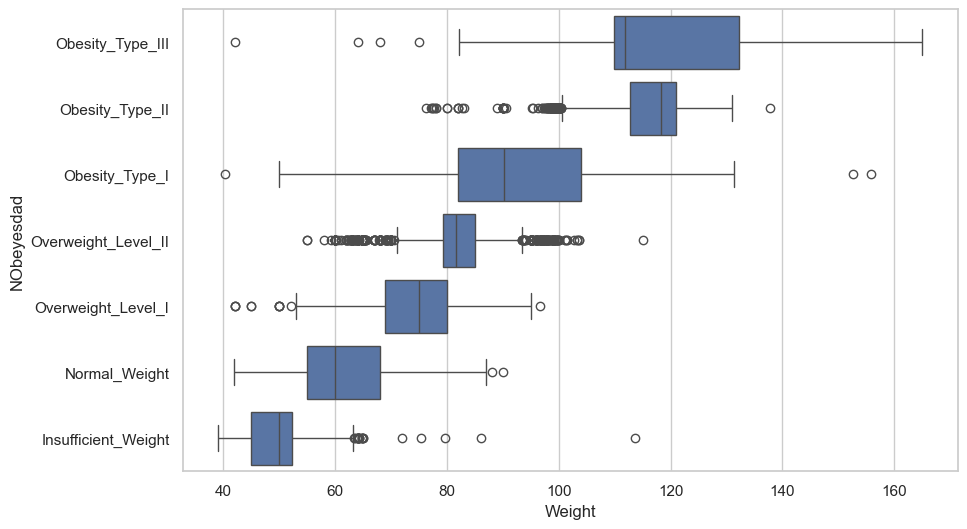

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='Weight', orient='h', order=order_seaborn)

plt.xlabel('Weight')
plt.ylabel('NObeyesdad')

plt.show()


Text(0.5, 0, 'family_history_with_overweight')

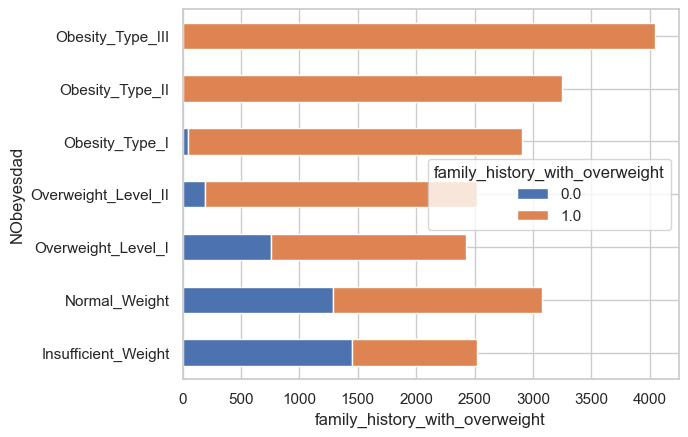

In [104]:
# Check SCC for each class
scc_counts = train_data.groupby('NObeyesdad')['family_history_with_overweight'].value_counts().unstack()

# Reorder rows
scc_counts = scc_counts.reindex(order)

# Check the distribution of the SCC in the dataset
scc_counts.plot(kind='barh', stacked=True)

plt.xlabel('family_history_with_overweight')

Text(0.5, 0, 'Consume high-calorie foods frequently')

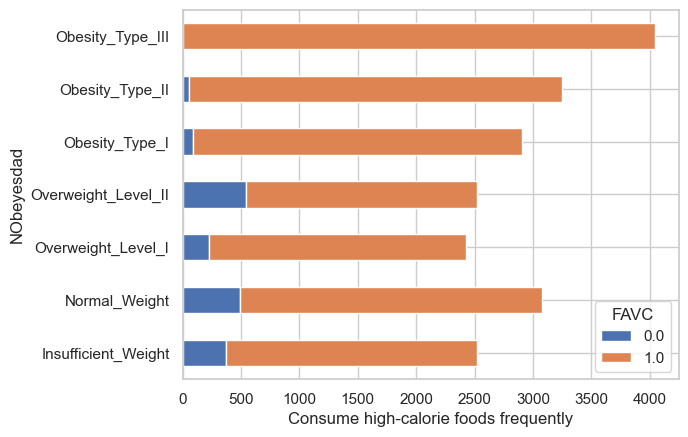

In [105]:
# Check SCC for each class
scc_counts = train_data.groupby('NObeyesdad')['FAVC'].value_counts().unstack()

# Reorder rows
scc_counts = scc_counts.reindex(order)

# Check the distribution of the SCC in the dataset
scc_counts.plot(kind='barh', stacked=True)

plt.xlabel('Consume high-calorie foods frequently')

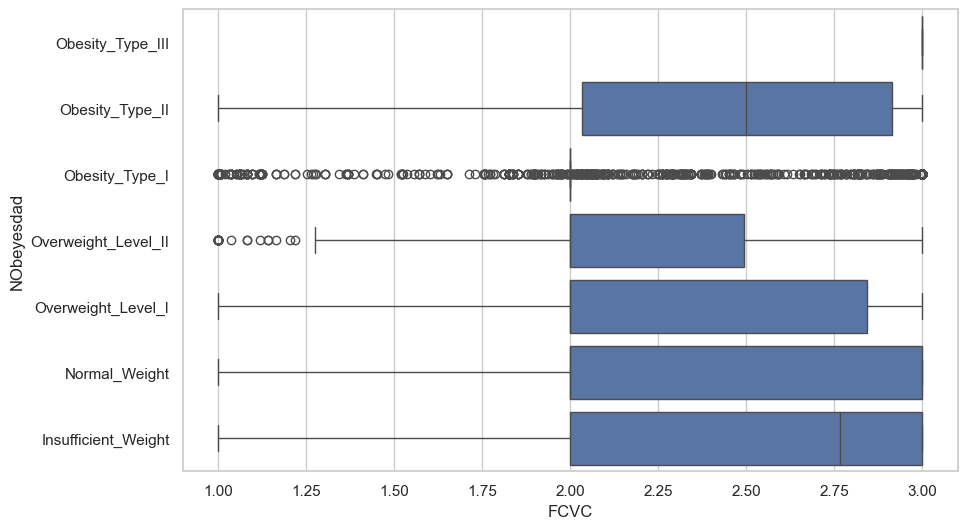

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='FCVC', orient='h', order=order_seaborn)

plt.xlabel('FCVC')
plt.ylabel('NObeyesdad')

plt.show()


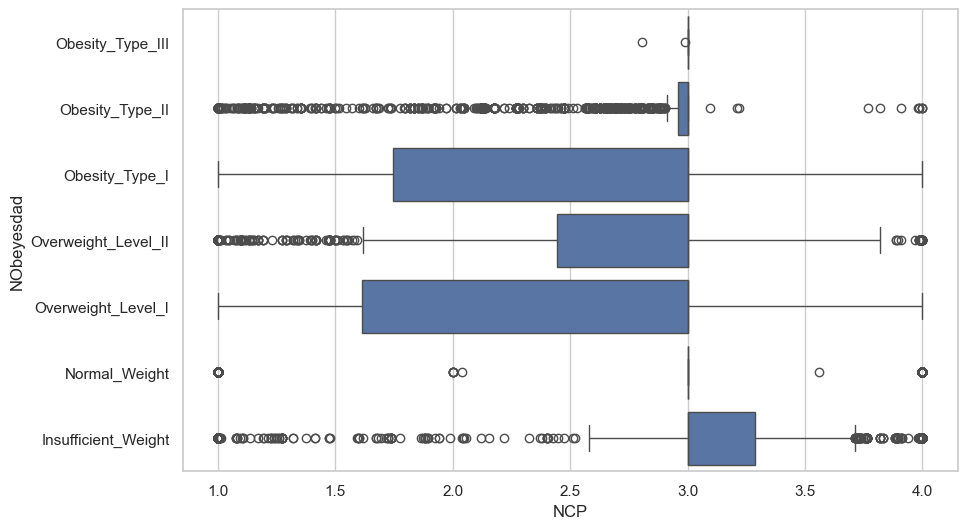

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='NCP', orient='h', order=order_seaborn)

plt.xlabel('NCP')
plt.ylabel('NObeyesdad')

plt.show()


Text(0.5, 0, 'Consumption of food between meals')

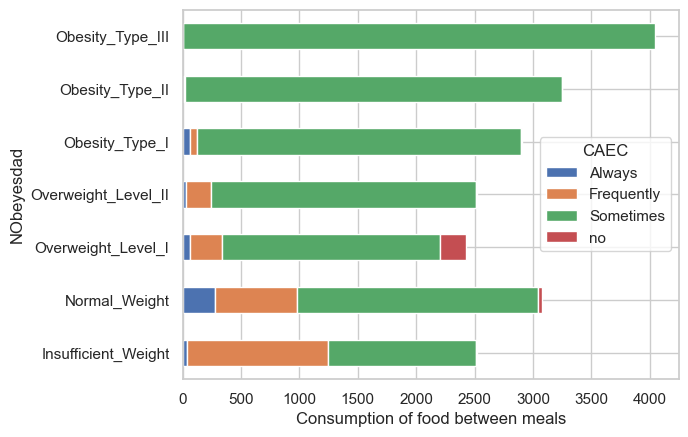

In [84]:
# Check CAEC for each class
caec_counts = train_data.groupby('NObeyesdad')['CAEC'].value_counts().unstack()

# Reorder rows
caec_counts = caec_counts.reindex(order)

# Check the distribution of the CAEC in the dataset
caec_counts.plot(kind='barh', stacked=True)

plt.xlabel('Consumption of food between meals')

Text(0.5, 0, 'Smoking habit')

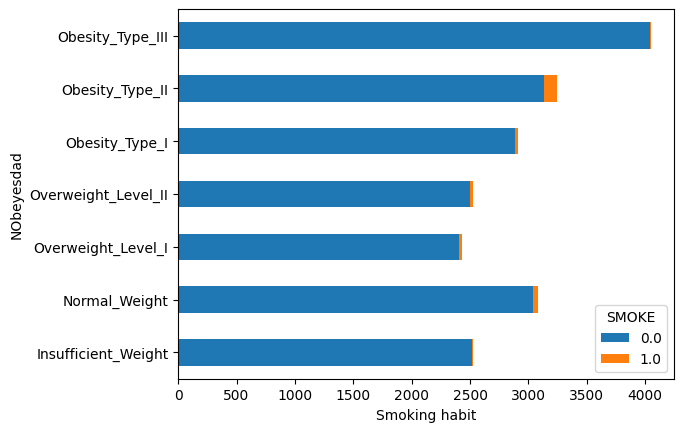

In [17]:
# Check SMOKE for each class
smoke_counts = train_data.groupby('NObeyesdad')['SMOKE'].value_counts().unstack()

# Reorder rows
smoke_counts = smoke_counts.reindex(order)

# Check the distribution of the SMOKE in the dataset
smoke_counts.plot(kind='barh', stacked=True)

plt.xlabel('Smoking habit')

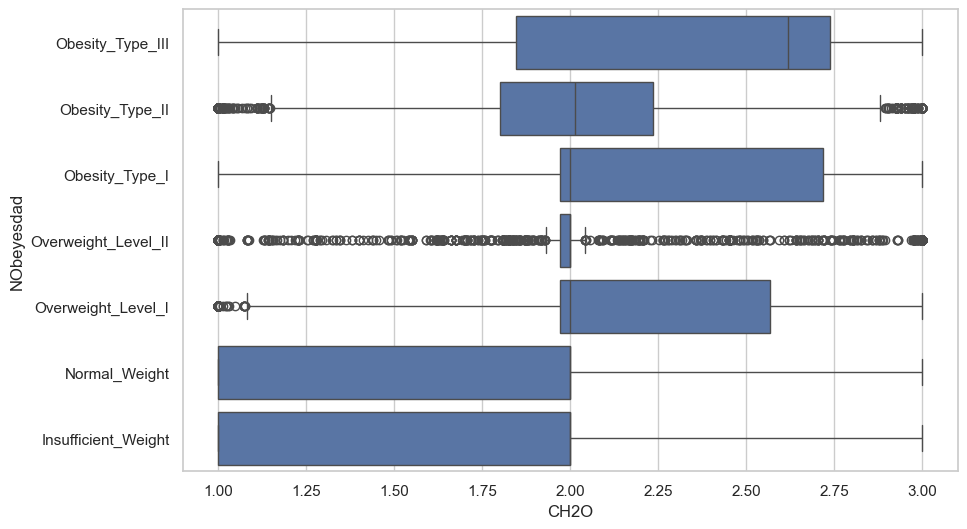

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='CH2O', orient='h', order=order_seaborn)

plt.xlabel('CH2O')
plt.ylabel('NObeyesdad')

plt.show()


Text(0.5, 0, 'Calories consumption monitoring')

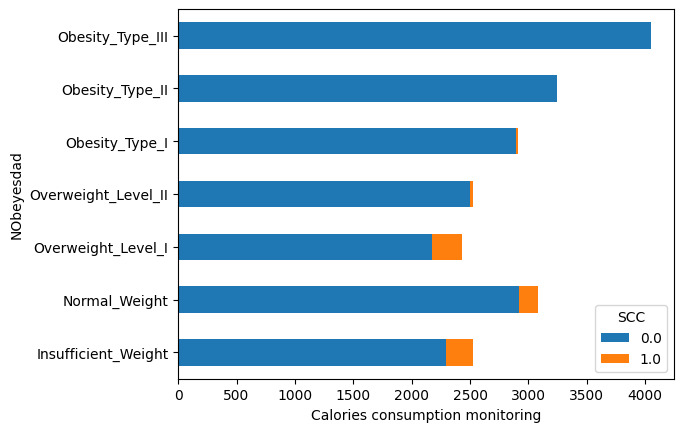

In [19]:
# Check SCC for each class
scc_counts = train_data.groupby('NObeyesdad')['SCC'].value_counts().unstack()

# Reorder rows
scc_counts = scc_counts.reindex(order)

# Check the distribution of the SCC in the dataset
scc_counts.plot(kind='barh', stacked=True)

plt.xlabel('Calories consumption monitoring')

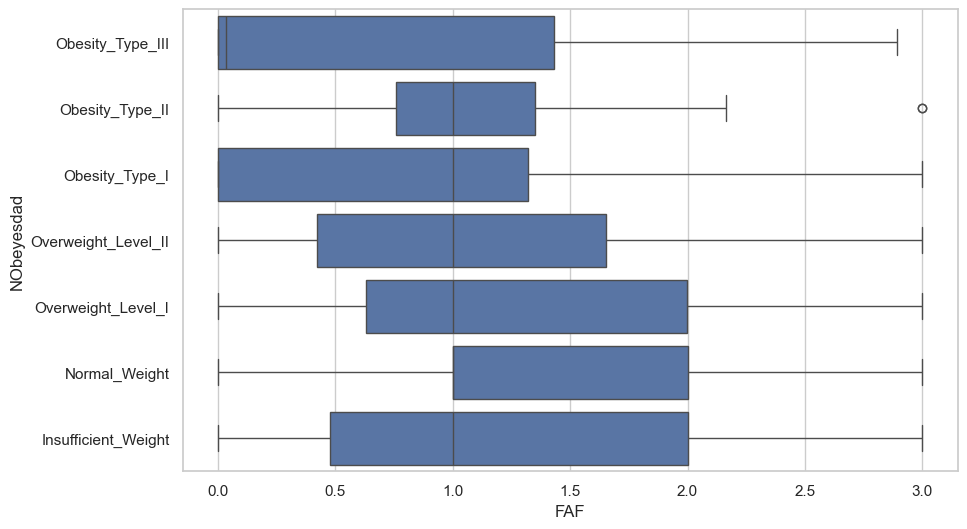

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='FAF', orient='h', order=order_seaborn)

plt.xlabel('FAF')
plt.ylabel('NObeyesdad')

plt.show()


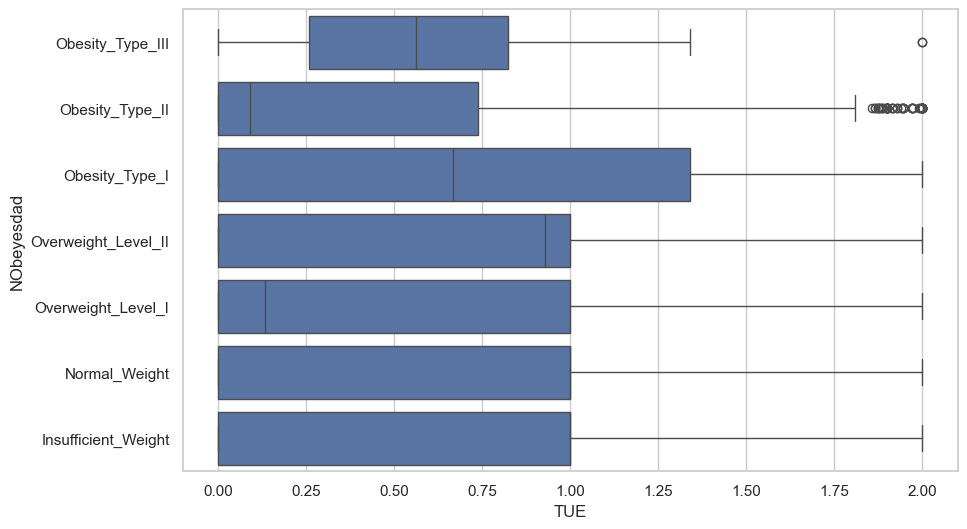

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='TUE', orient='h', order=order_seaborn)

plt.xlabel('TUE')
plt.ylabel('NObeyesdad')

plt.show()


Text(0.5, 0, 'Consumption of alcohol')

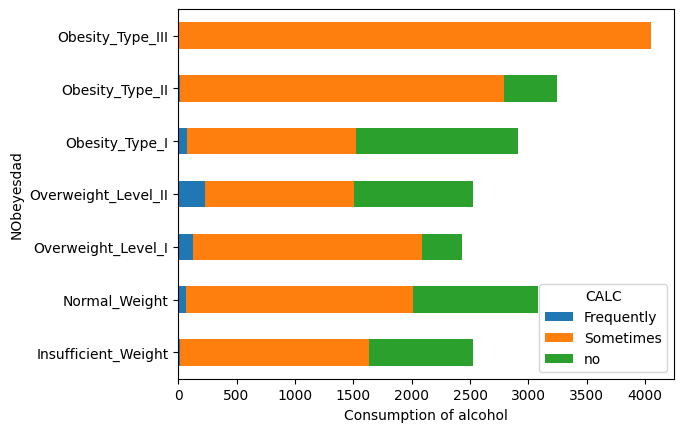

In [22]:
# Check CALC for each class
calc_counts = train_data.groupby('NObeyesdad')['CALC'].value_counts().unstack()

# Reorder rows
calc_counts = calc_counts.reindex(order)

# Check the distribution of the CALC in the dataset
calc_counts.plot(kind='barh', stacked=True)

plt.xlabel('Consumption of alcohol')

Text(0.5, 0, 'Transportation used')

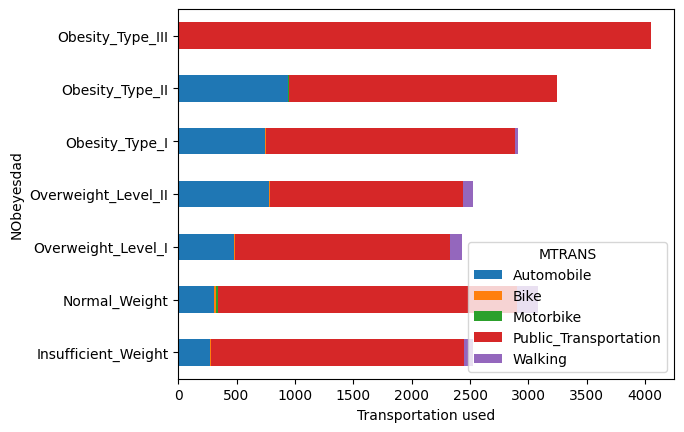

In [23]:
# Check MTRANS for each class
mtrans_counts = train_data.groupby('NObeyesdad')['MTRANS'].value_counts().unstack()

# Reorder rows
mtrans_counts = mtrans_counts.reindex(order)

# Check the distribution of the MTRANS in the dataset
mtrans_counts.plot(kind='barh', stacked=True)

plt.xlabel('Transportation used')

## Data distribuition

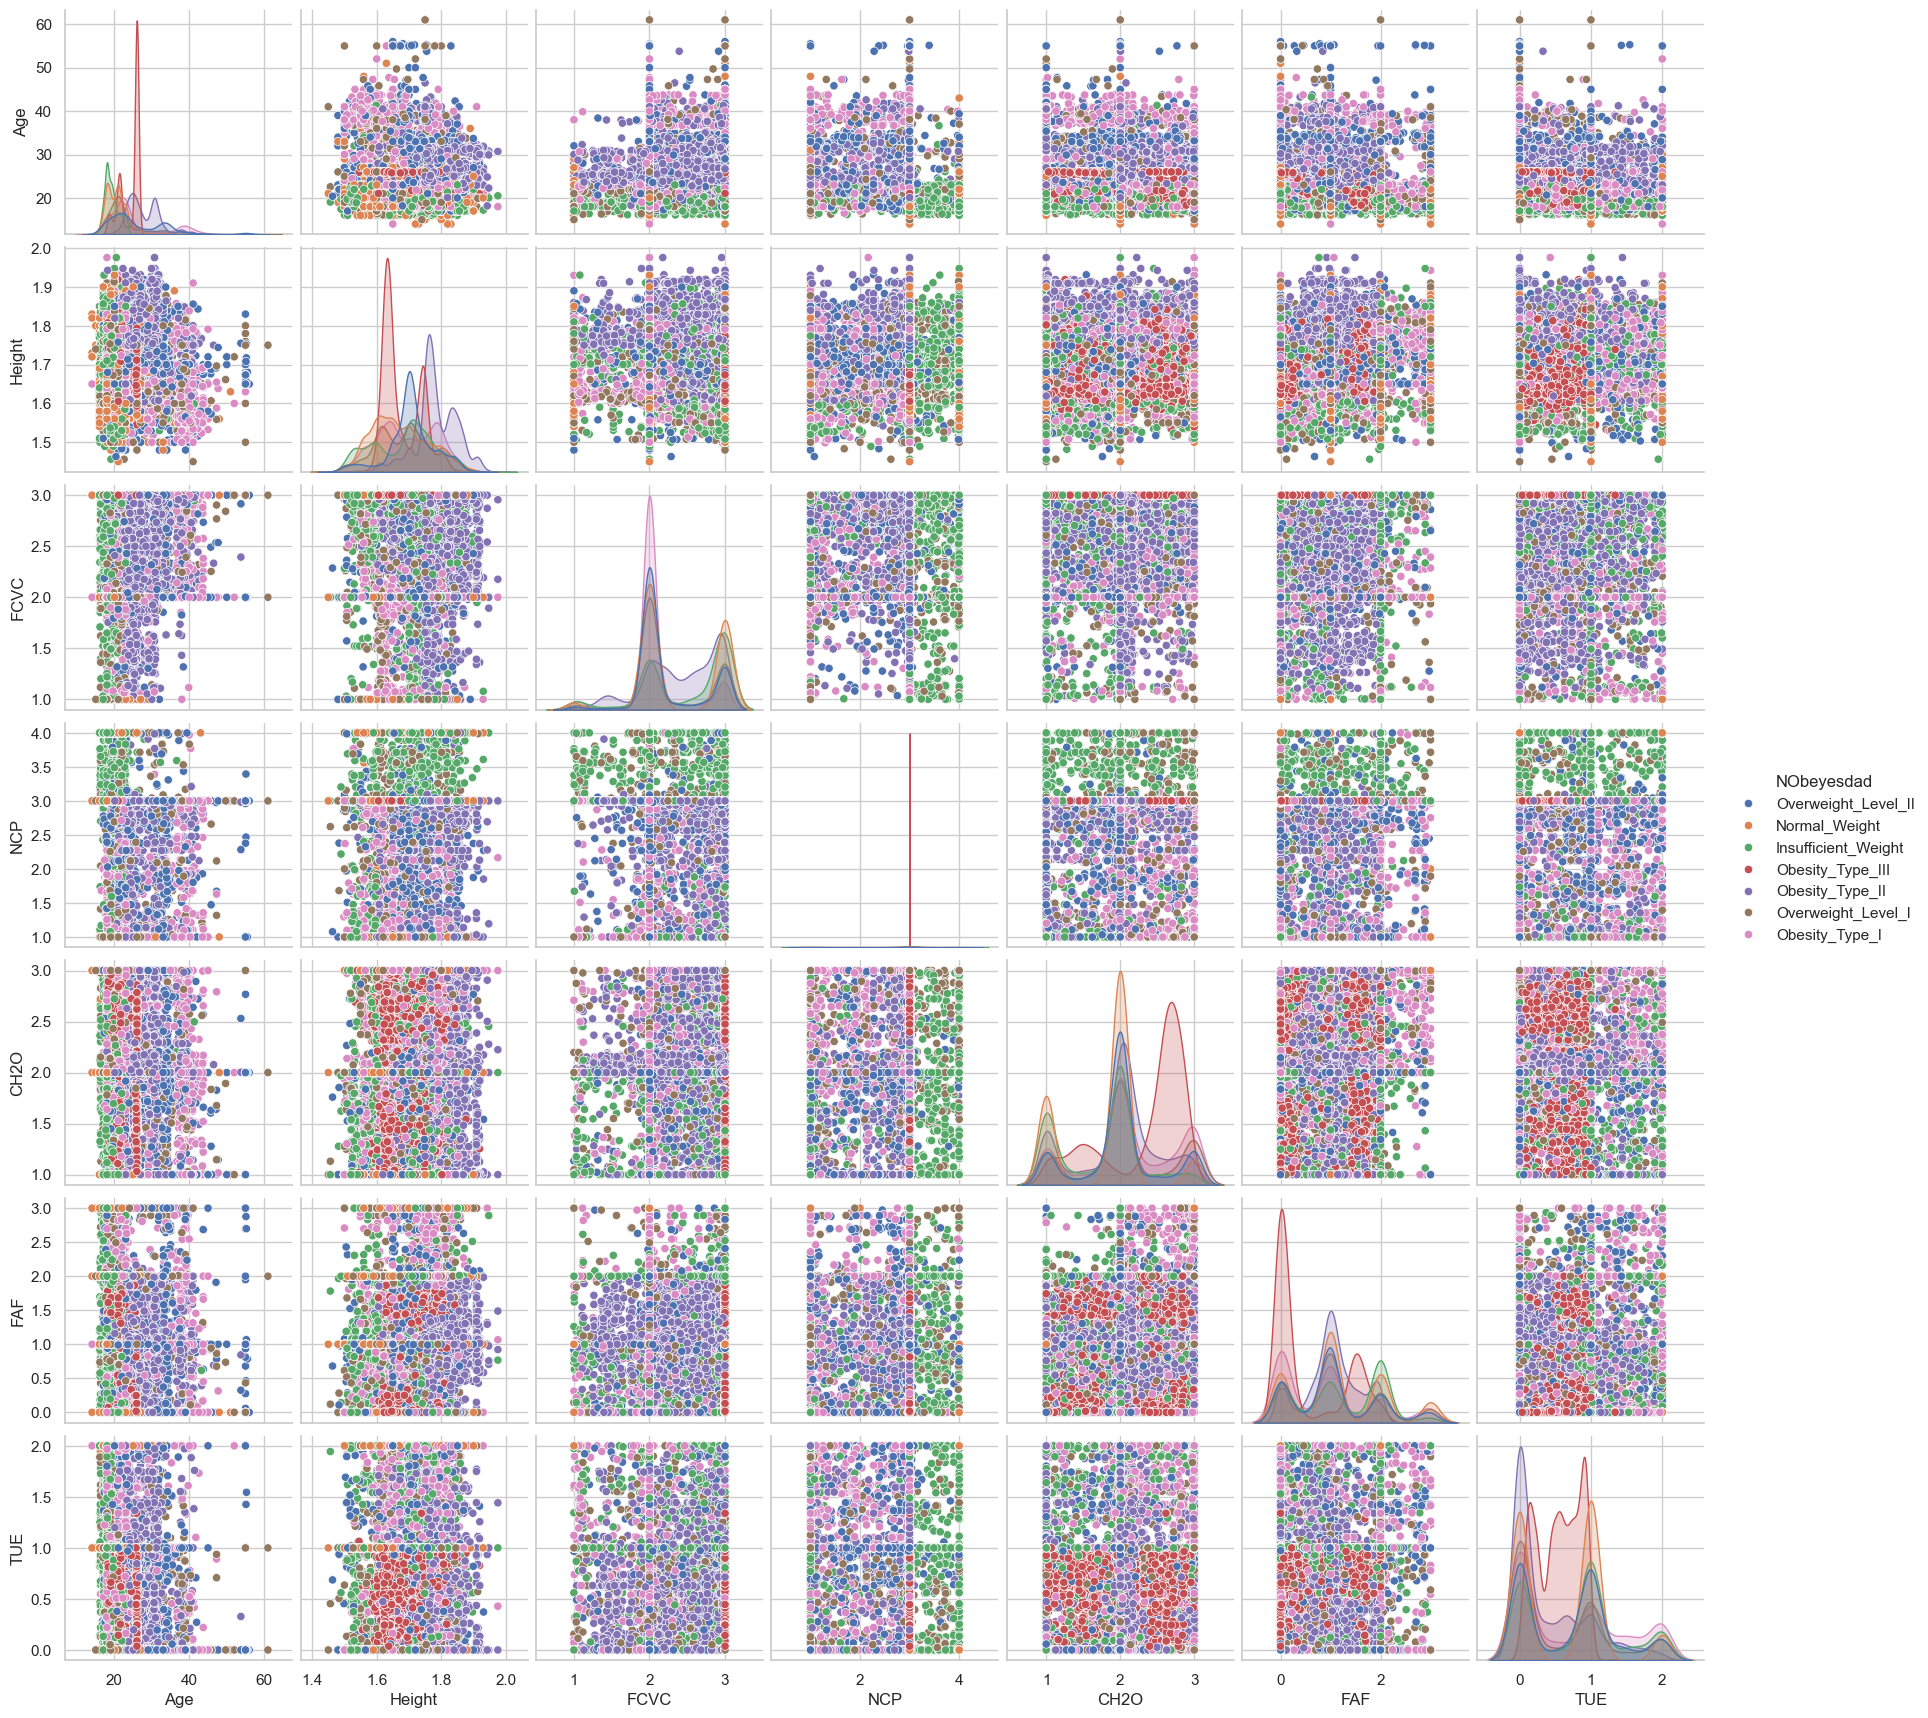

In [106]:
sns.pairplot(train_data[['Age','Height','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC','MTRANS','NObeyesdad']], hue = 'NObeyesdad')

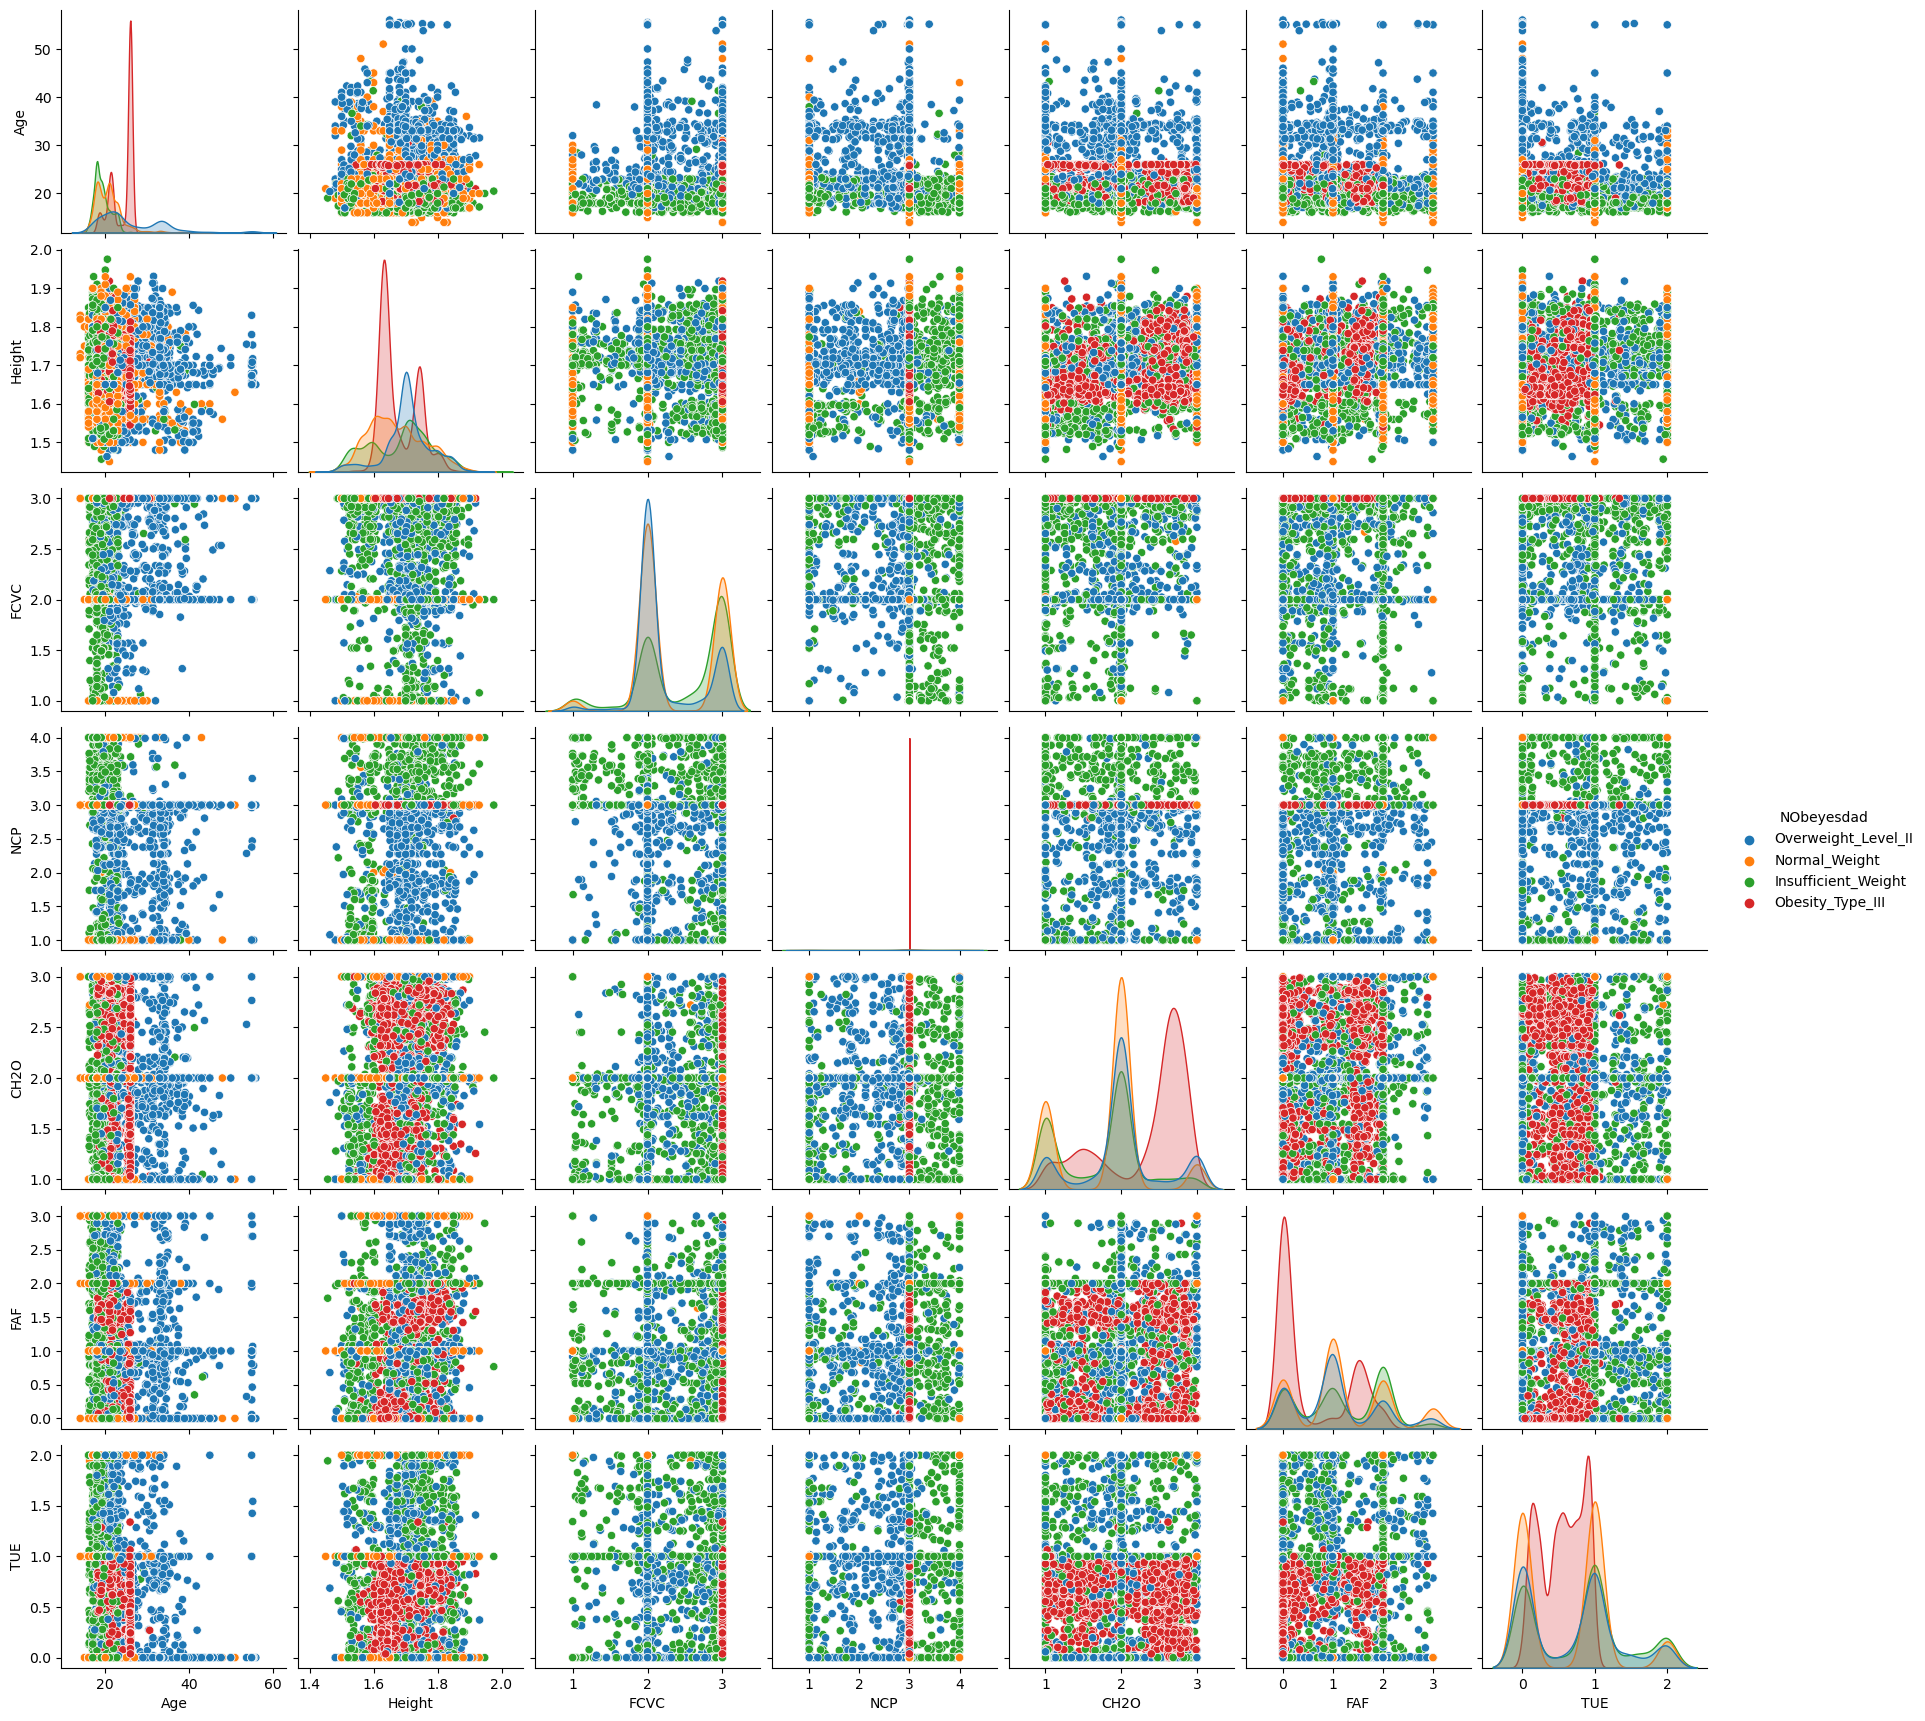

In [8]:
filtered_train_data = train_data[train_data['NObeyesdad'].isin(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II', 'Obesity_Type_III'])]
sns.pairplot(filtered_train_data[['Age','Height','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC','MTRANS','NObeyesdad']], hue = 'NObeyesdad')


## See categorical data

In [9]:
train_data['NObeyesdad'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [10]:
train_data['CAEC'].value_counts()

Sometimes     17529
Frequently     2472
Always          478
no              279
Name: CAEC, dtype: int64

In [11]:
train_data['CALC'].value_counts()

Sometimes     15066
no             5163
Frequently      529
Name: CALC, dtype: int64

In [12]:
train_data['MTRANS'].value_counts()

Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: MTRANS, dtype: int64

## Encode columns

In [77]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Defina as categorias como uma lista simples
categories = [['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'Sometimes', 'Frequently','Always'], ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']]

# Inicialize o codificador ordinal
ord_enc = OrdinalEncoder(categories=categories)

# Aplique o codificador ordinal aos dados
ord_encoded_data = ord_enc.fit_transform(train_data[['CAEC', 'CALC', 'NObeyesdad']])

# Aplicar one hot encoding
one_hot_enc = OneHotEncoder()
one_hot_encoded_data = one_hot_enc.fit_transform(train_data[['MTRANS']])

# Convertendo a matriz esparsa para um DataFrame
one_hot_encoded_data = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_data)
one_hot_encoded_data.columns = one_hot_enc.get_feature_names_out()


In [78]:
# Concatenar os DataFrames
train_data = pd.concat([train_data, pd.DataFrame(ord_encoded_data, columns=['CAEC_Label', 'CALC_Label', 'NObeyesdad_Label']), one_hot_encoded_data], axis=1)

# Remover as colunas originais
train_data = train_data.drop(columns=['CAEC', 'CALC', 'MTRANS', 'NObeyesdad'])


In [10]:
train_data.head()

id  Gender        Age    Height      Weight  \
0   0     1.0  24.443011  1.699998   81.669950   
1   1     0.0  18.000000  1.560000   57.000000   
2   2     0.0  18.000000  1.711460   50.165754   
3   3     0.0  20.952737  1.710730  131.274851   
4   4     1.0  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  SMOKE  ...  \
0                             1.0   1.0  2.000000  2.983297    0.0  ...   
1                             1.0   1.0  2.000000  3.000000    0.0  ...   
2                             1.0   1.0  1.880534  1.411685    0.0  ...   
3                             1.0   1.0  3.000000  3.000000    0.0  ...   
4                             1.0   1.0  2.679664  1.971472    0.0  ...   

        FAF       TUE  CAEC_Label  CALC_Label  NObeyesdad_Label  \
0  0.000000  0.976473         1.0         1.0               3.0   
1  1.000000  1.000000         2.0         0.0               1.0   
2  0.866045  1.673584         1.0         0.0               0.0   
3  1.467863  0.780199         1.0         1.0               6.0   
4  1.967973  0.931721         1.0         1.0               3.0   

   MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0                  0            0                 0   
1                1.0            0                 0   
2                  0            0                 0   
3                  0            0                 0   
4                  0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                           1.0               0  
1                             0               0  
2                           1.0               0  
3                           1.0               0  
4                           1.0               0  

[5 rows x 22 columns]

In [295]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01) # Example threshold
X_reduced = selector.fit_transform(train_data)

# Print removed columns
removed_columns = train_data.columns[~selector.get_support()]
print(removed_columns)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
reduced_train_data = train_data.iloc[:,cols]


Index(['Height', 'x0_Bike', 'x0_Motorbike'], dtype='object')


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Variance analysis of the features

c:\Users\T-Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\T-Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\T-Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

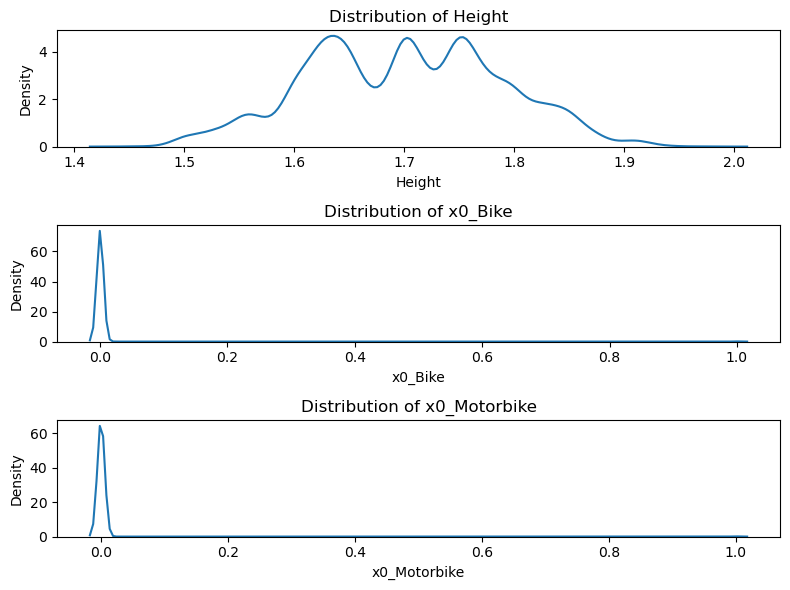

In [296]:
# Crie uma figura e eixos para os três subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 6))

# Plot do gráfico para Height
sns.distplot(train_data['Height'], hist=False, label='Height', ax=axes[0])

# Plot do gráfico para x0_Bike
sns.distplot(train_data['x0_Bike'], hist=False, label='x0_Bike', ax=axes[1])

# Plot do gráfico para x0_Motorbike
sns.distplot(train_data['x0_Motorbike'], hist=False, label='x0_Motorbike', ax=axes[2])

# Adicione rótulos e títulos
axes[0].set_title('Distribution of Height')
axes[1].set_title('Distribution of x0_Bike')
axes[2].set_title('Distribution of x0_Motorbike')

# Ajuste o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()


## Doing the cleaning with test_data

In [298]:
# Change yes and no to 1 and 0
test_data['Gender'] = test_data['Gender'].replace({'Male': 1.0, 'Female': 0.0})
test_data['family_history_with_overweight'] = test_data['family_history_with_overweight'].replace({'yes': 1.0, 'no': 0.0})
test_data['FAVC'] = test_data['FAVC'].replace({'yes': 1.0, 'no': 0.0})
test_data['SMOKE'] = train_data['SMOKE'].replace({'yes': 1.0, 'no': 0.0})
test_data['SCC'] = test_data['SCC'].replace({'yes': 1.0, 'no': 0.0})


# Define the categories
categories = [['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'Sometimes', 'Frequently','Always']]

# Apply the ordinal encoder to the data

ord_enc = OrdinalEncoder(categories=categories)
ord_encoded_data = ord_enc.fit_transform(test_data[['CAEC', 'CALC']])

# Apply one hot encoding
one_hot_enc = OneHotEncoder()
one_hot_encoded_data = one_hot_enc.fit_transform(test_data[['MTRANS']])

# Convert the sparse matrix to a DataFrame
one_hot_encoded_data = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_data)
one_hot_encoded_data.columns = one_hot_enc.get_feature_names()

# Concat the DataFrames
test_data = pd.concat([test_data, pd.DataFrame(ord_encoded_data, columns=['CAEC_Label', 'CALC_Label']), one_hot_encoded_data], axis=1)

# Remove the original columns
test_data = test_data.drop(columns=['CAEC', 'CALC', 'MTRANS'])


In [299]:
test_data.head()

id  Gender        Age    Height      Weight  \
0  20758     1.0  26.899886  1.848294  120.644178   
1  20759     0.0  21.000000  1.600000   66.000000   
2  20760     0.0  26.000000  1.643355  111.600553   
3  20761     1.0  20.979254  1.553127  103.669116   
4  20762     0.0  26.000000  1.627396  104.835346   

   family_history_with_overweight  FAVC      FCVC       NCP  SMOKE  ...  SCC  \
0                             1.0   1.0  2.938616  3.000000    0.0  ...  0.0   
1                             1.0   1.0  2.000000  1.000000    0.0  ...  0.0   
2                             1.0   1.0  3.000000  3.000000    0.0  ...  0.0   
3                             1.0   1.0  2.000000  2.977909    0.0  ...  0.0   
4                             1.0   1.0  3.000000  3.000000    0.0  ...  0.0   

        FAF       TUE  CAEC_Label  CALC_Label  x0_Automobile  x0_Bike  \
0  0.855400  0.000000         1.0         1.0            0.0      0.0   
1  1.000000  0.000000         1.0         1.0            0.0      0.0   
2  0.000000  0.250502         1.0         1.0            0.0      0.0   
3  0.094851  0.000000         1.0         1.0            0.0      0.0   
4  0.000000  0.741069         1.0         1.0            0.0      0.0   

   x0_Motorbike  x0_Public_Transportation  x0_Walking  
0           0.0                       1.0         0.0  
1           0.0                       1.0         0.0  
2           0.0                       1.0         0.0  
3           0.0                       1.0         0.0  
4           0.0                       1.0         0.0  

[5 rows x 21 columns]

In [300]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01) # Example threshold
X_reduced = selector.fit_transform(test_data)

# Print removed columns
removed_columns = test_data.columns[~selector.get_support()]
print(removed_columns)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
reduced_test_data = test_data.iloc[:,cols]


Index(['Height', 'x0_Bike', 'x0_Motorbike'], dtype='object')


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Choosing model

### Only basic feature engineering 

In [79]:
# Import the required libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.decomposition import PCA



In [80]:
# Modeling differents algorithms. 

random_state = 2
classifiers = []

classifiers.append(('KNeighbors', KNeighborsClassifier()))
classifiers.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
#classifiers.append(('SVC', SVC(random_state=random_state)))
#classifiers.append(('BernoulliNB', BernoulliNB()))
classifiers.append(('LogisticRegression', LogisticRegression(random_state=random_state)))
classifiers.append(('DecisionTree', DecisionTreeClassifier(random_state=random_state)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))


X_train = train_data.drop(columns=['id','NObeyesdad_Label'])
y_train = train_data['NObeyesdad_Label']

param_grid = {
    'KNeighbors': {'n_neighbors': [3, 11, 13], 'weights': ['uniform', 'distance']},
    'LinearDiscriminantAnalysis': {'solver': ['svd', 'lsqr', 'eigen']},
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']},
    'BernoulliNB': {'alpha': [0.1, 0.5, 1.0]},
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']},
    'RandomForest': {'n_estimators': [200, 300], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'criterion': ['gini', 'entropy']}
}

results_dict = {'Classifier': [], 'Accuracy': [], 'Best Parameters': [], 'Time (s)': []}

for name, classifier in classifiers:
    # Inicie a contagem do tempo
    start_time = time.time()
    
    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), cv=5, n_jobs=-1)
    
    # Execute o GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Obtenha o melhor modelo
    best_model = grid_search.best_estimator_
    
    # Armazene os resultados no dicionário
    results_dict['Classifier'].append(name)
    results_dict['Accuracy'].append(grid_search.best_score_)
    results_dict['Best Parameters'].append(grid_search.best_params_)
    # Calcule o tempo de execução
    elapsed_time = time.time() - start_time
    results_dict['Time (s)'].append(elapsed_time)
    
    # Imprima o desempenho médio do classificador e o tempo de execução
    print(f"{name}: Accuracy: {grid_search.best_score_:.4f}, Best Parameters: {grid_search.best_params_}, Time: {elapsed_time:.2f} s")




C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


KNeighbors: Accuracy: 0.8477, Best Parameters: {'n_neighbors': 11, 'weights': 'uniform'}, Time: 25.10 s


C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

LinearDiscriminantAnalysis: Accuracy: 0.8178, Best Parameters: {'solver': 'svd'}, Time: 1.03 s


C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression: Accuracy: 0.8603, Best Parameters: {'C': 10, 'solver': 'newton-cg'}, Time: 155.85 s


C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


DecisionTree: Accuracy: 0.8754, Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}, Time: 7.70 s


C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForest: Accuracy: 0.8989, Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}, Time: 399.84 s


### With feature scaling

In [81]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()

X_train = train_data.drop(columns=['id','NObeyesdad_Label'])
y_train = train_data['NObeyesdad_Label']

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)


param_grid = {
    'KNeighbors': {'n_neighbors': [3, 11, 13], 'weights': ['uniform', 'distance']},
    'LinearDiscriminantAnalysis': {'solver': ['svd', 'lsqr', 'eigen']},
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']},
    'BernoulliNB': {'alpha': [0.1, 0.5, 1.0]},
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']},
    'RandomForest': {'n_estimators': [200, 300], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'criterion': ['gini', 'entropy']}
}

for name, classifier in classifiers:
    # Inicie a contagem do tempo
    start_time = time.time()
    
    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), cv=5, n_jobs=-1)
    
    # Execute o GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Obtenha o melhor modelo
    best_model = grid_search.best_estimator_
    
    # Armazene os resultados no dicionário
    results_dict['Classifier'].append(name + "_Feature_Scaling")
    results_dict['Accuracy'].append(grid_search.best_score_)
    results_dict['Best Parameters'].append(grid_search.best_params_)
    # Calcule o tempo de execução
    elapsed_time = time.time() - start_time
    results_dict['Time (s)'].append(elapsed_time)
    
    # Imprima o desempenho médio do classificador e o tempo de execução
    print(f"{name}: Accuracy: {grid_search.best_score_:.4f}, Best Parameters: {grid_search.best_params_}, Time: {elapsed_time:.2f} s")




C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


KNeighbors: Accuracy: 0.8477, Best Parameters: {'n_neighbors': 11, 'weights': 'uniform'}, Time: 13.94 s


C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

LinearDiscriminantAnalysis: Accuracy: 0.8178, Best Parameters: {'solver': 'svd'}, Time: 1.09 s


C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression: Accuracy: 0.8603, Best Parameters: {'C': 10, 'solver': 'newton-cg'}, Time: 168.48 s


C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


DecisionTree: Accuracy: 0.8754, Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}, Time: 8.30 s


C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForest: Accuracy: 0.8989, Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}, Time: 292.94 s


In [83]:
df = pd.DataFrame(results_dict)
df

Classifier  Accuracy  \
0                                       KNeighbors  0.847722   
1                       LinearDiscriminantAnalysis  0.817757   
2                               LogisticRegression  0.860295   
3                                     DecisionTree  0.875421   
4                                     RandomForest  0.898931   
5                       KNeighbors_Feature_Scaling  0.847722   
6       LinearDiscriminantAnalysis_Feature_Scaling  0.817757   
7               LogisticRegression_Feature_Scaling  0.860295   
8                     DecisionTree_Feature_Scaling  0.875421   
9                     RandomForest_Feature_Scaling  0.898931   
10                  KNeighbors_Feature_Scaling+PCA  0.819829   
11  LinearDiscriminantAnalysis_Feature_Scaling+PCA  0.701368   
12          LogisticRegression_Feature_Scaling+PCA  0.738125   
13                DecisionTree_Feature_Scaling+PCA  0.799788   
14                RandomForest_Feature_Scaling+PCA  0.831728   

                                      Best Parameters    Time (s)  
0           {'n_neighbors': 11, 'weights': 'uniform'}   25.101362  
1                                   {'solver': 'svd'}    1.031697  
2                    {'C': 10, 'solver': 'newton-cg'}  155.849655  
3   {'criterion': 'gini', 'max_depth': 10, 'min_sa...    7.701576  
4   {'criterion': 'entropy', 'max_depth': 20, 'min...  399.841106  
5           {'n_neighbors': 11, 'weights': 'uniform'}   13.944319  
6                                   {'solver': 'svd'}    1.092042  
7                    {'C': 10, 'solver': 'newton-cg'}  168.479745  
8   {'criterion': 'gini', 'max_depth': 10, 'min_sa...    8.297574  
9   {'criterion': 'entropy', 'max_depth': 20, 'min...  292.939221  
10          {'n_neighbors': 13, 'weights': 'uniform'}    4.109264  
11                                  {'solver': 'svd'}    0.477420  
12                   {'C': 10, 'solver': 'newton-cg'}   57.478119  
13  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   17.991598  
14  {'criterion': 'entropy', 'max_depth': 20, 'min...  833.340629

### With feature scaling + PCA

In [82]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()

X_train = train_data.drop(columns=['id','NObeyesdad_Label'])
y_train = train_data['NObeyesdad_Label']

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)

# Create a PCA instance
pca = PCA(n_components = 5)

# Apply PCA to the training data
X_train_pca = pca.fit_transform(X_train)

param_grid = {
    'KNeighbors': {'n_neighbors': [3, 11, 13], 'weights': ['uniform', 'distance']},
    'LinearDiscriminantAnalysis': {'solver': ['svd', 'lsqr', 'eigen']},
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']},
    'BernoulliNB': {'alpha': [0.1, 0.5, 1.0]},
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']},
    'RandomForest': {'n_estimators': [200, 300], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'criterion': ['gini', 'entropy']}
}


for name, classifier in classifiers:
    # Inicie a contagem do tempo
    start_time = time.time()
    
    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), cv=5, n_jobs=-1)
    
    # Execute o GridSearchCV
    grid_search.fit(X_train_pca, y_train)
    
    # Obtenha o melhor modelo
    best_model = grid_search.best_estimator_
    
    # Armazene os resultados no dicionário
    results_dict['Classifier'].append(name + "_Feature_Scaling+PCA")
    results_dict['Accuracy'].append(grid_search.best_score_)
    results_dict['Best Parameters'].append(grid_search.best_params_)
    # Calcule o tempo de execução
    elapsed_time = time.time() - start_time
    results_dict['Time (s)'].append(elapsed_time)
    
    # Imprima o desempenho médio do classificador e o tempo de execução
    print(f"{name}: Accuracy: {grid_search.best_score_:.4f}, Best Parameters: {grid_search.best_params_}, Time: {elapsed_time:.2f} s")




C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\a239277\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


KNeighbors: Accuracy: 0.8198, Best Parameters: {'n_neighbors': 13, 'weights': 'uniform'}, Time: 4.11 s
LinearDiscriminantAnalysis: Accuracy: 0.7014, Best Parameters: {'solver': 'svd'}, Time: 0.48 s
LogisticRegression: Accuracy: 0.7381, Best Parameters: {'C': 10, 'solver': 'newton-cg'}, Time: 57.48 s
DecisionTree: Accuracy: 0.7998, Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}, Time: 17.99 s
RandomForest: Accuracy: 0.8317, Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}, Time: 833.34 s


In [33]:
from pca import pca

# Initialize
model = pca()

x_train_2 = X_train.drop('id', axis=1)
# Fit transform
out = model.fit_transform(x_train_2)

# Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [20] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [1] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [20] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
     PC                         feature   loading  type
0   PC1                          Weight  0.997862  best
1   PC1                          Gender  0.002252  weak
2   PC1                             Age  0.063689  weak
3   PC1                          Height  0

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 1 Principal Components explain [99.56%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

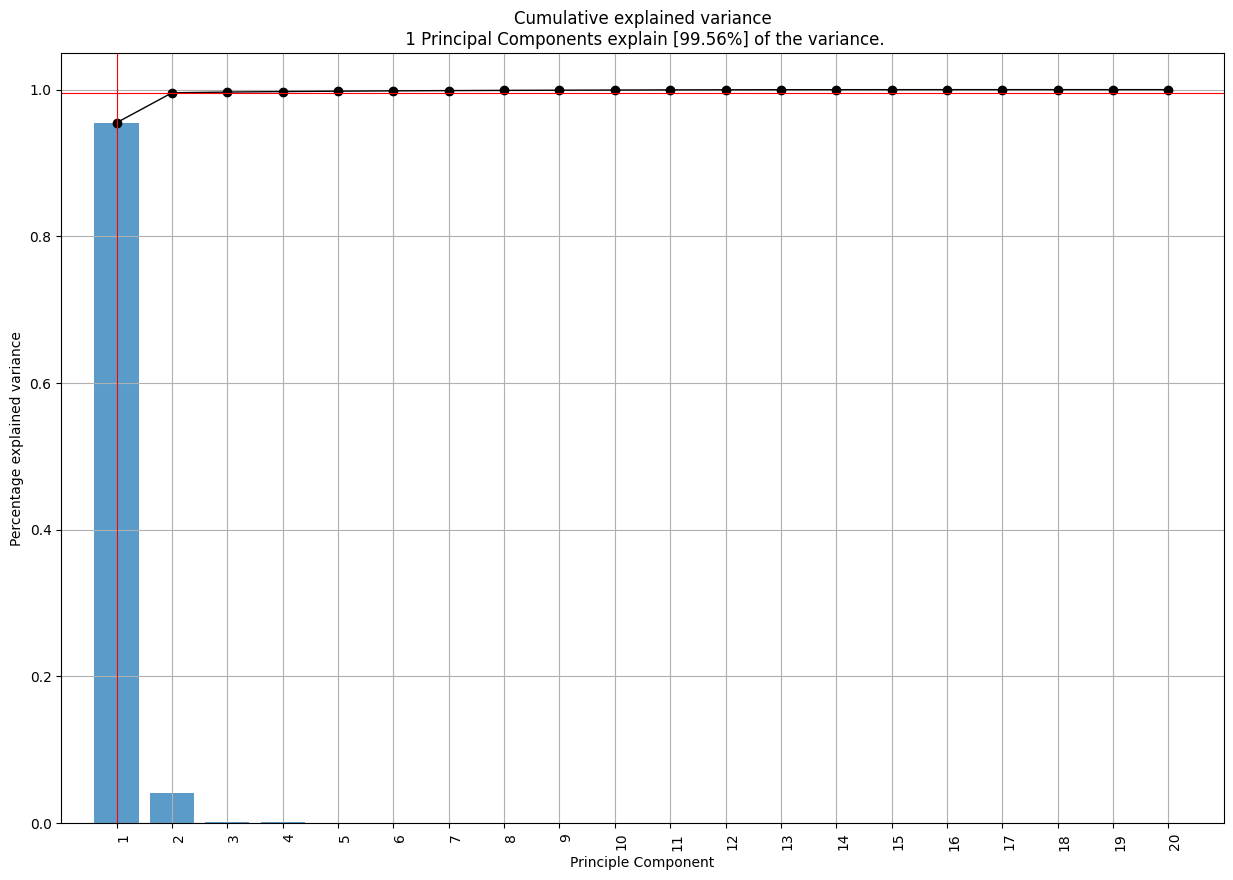

In [34]:
model.plot()


<Axes: >

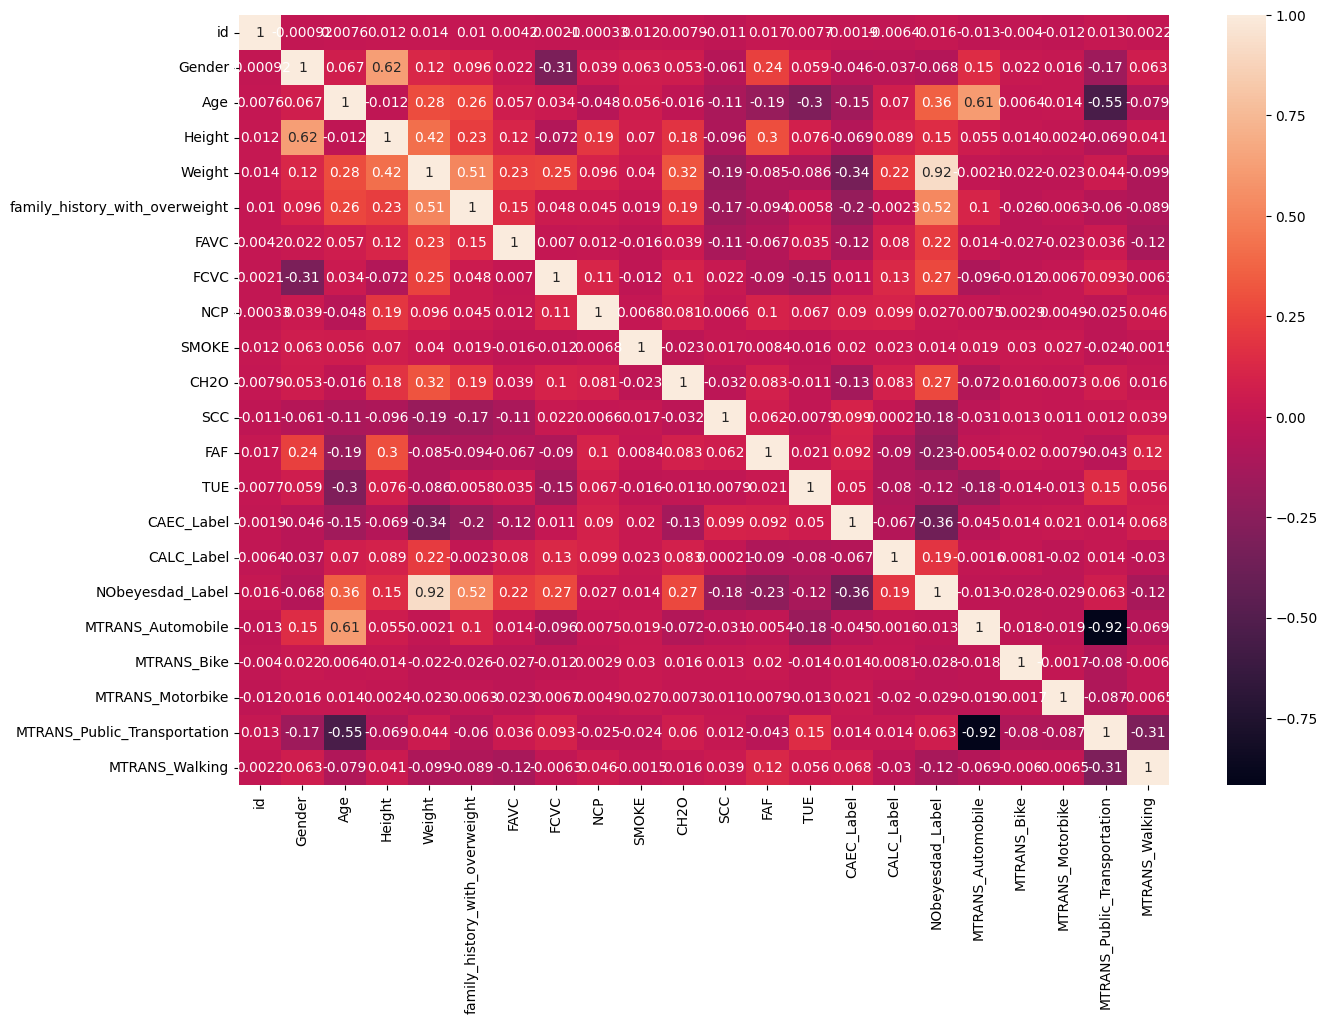

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.select_dtypes('number').corr(), annot=True)